In [2]:
#Step1: Import required packages

# Pandas: a library for manipulating tabular data (e.g. data in rows and columns)
# NumPy: a library that helps perform mathematical functions on arrays
# Matplotlib: a library for creating plots and visualizations
# Seaborn: a data visualization library that builds on top of matplotlib to offer a wider variety of visualizations (I often prefer seaborn plots over matplotlib plots)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Step2 : Read data from source
#Best Practice to set the working directory before we
import os
os.chdir("C:\\Users\\VasuReddyMallela\\VM\\")

print(os.getcwd())

#process the data
df = pd.read_csv("House.csv")


C:\Users\VasuReddyMallela\VM


In [4]:
data=df

In [ ]:
# Exploratory Data Analysis

#Step3: Sanity checks
# 1. shape of the data
data.shape


In [ ]:
data.head()

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


In [ ]:
# 2. Mising values from describe or is.null()
data.describe()


In [ ]:
#dummy_gender =pd.get_dummies(data['Gender'],prefix='Gender',prefix_sep='_')

#appending the new dummy variables to original data set
#data=pd.concat([data,dummy_Gender],axis=1)


In [ ]:
data.isnull().sum()


In [ ]:
data.isnull().sum().sum()


In [ ]:
sanitychecks = data.describe().T
data.describe().T.to_csv("sanitychecks.csv")


In [ ]:
# Step5: EDA
# To gain more understanding about data
# lot of cross tabs, graphs, charts....

#data distribution plot
sns.pairplot(data)


In [ ]:
#sns.distplot(data['price'])

sns.displot(data=data, x="price")


In [ ]:
sns.displot(data=data, x="sqft_living")


In [ ]:
#'One way'
data['bedrooms'].value_counts()


In [ ]:
data['floors'].value_counts()


In [ ]:
#'two way'
CT=pd.crosstab(index=data["floors"],columns=data["bedrooms"])
CT


In [ ]:
# boxplot to identify outliers

plt.boxplot(data["price"])


In [ ]:
plt.boxplot(data["bedrooms"])


In [ ]:
# boxplot to identify outliers

fig = plt.figure(figsize=(6,5))

plt.boxplot([data['sqft_living'], data['sqft_lot'], data['sqft_above'],data['sqft_basement']], widths=1)
plt.xticks([1,2,3,4],['sqft_living', 'sqft_lot','sqft_above','sqft_basement'])
plt.ylabel('Sqft')
plt.title('Box plot of Area')
plt.show()



In [18]:
########################################################
################### function to detect outliers
def detect_outliers_iqr(data1):
    outliers = []
    data1 = sorted(data1)
    q1 = np.percentile(data1, 25)
    q3 = np.percentile(data1, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data1: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code



In [4]:
# fixing the outliers
price_outliers = detect_outliers_iqr(data['price'])
print("price Outliers from IQR method: ", price_outliers)


price Outliers from IQR method:  [1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1130000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1140000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1150000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0, 1160000.0

In [5]:
price_outliers = detect_outliers_iqr(data['sqft_living'])
print("sqft_living Outliers from IQR method: ", price_outliers)


sqft_living Outliers from IQR method:  [4240, 4240, 4240, 4240, 4240, 4240, 4240, 4250, 4250, 4250, 4250, 4250, 4250, 4250, 4250, 4250, 4250, 4260, 4260, 4260, 4260, 4260, 4260, 4270, 4270, 4270, 4270, 4270, 4270, 4270, 4270, 4270, 4270, 4270, 4280, 4280, 4280, 4280, 4280, 4280, 4280, 4280, 4280, 4285, 4285, 4290, 4290, 4290, 4290, 4290, 4290, 4290, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4300, 4310, 4310, 4310, 4310, 4310, 4320, 4320, 4320, 4320, 4320, 4320, 4320, 4320, 4320, 4330, 4330, 4330, 4330, 4340, 4340, 4340, 4340, 4340, 4340, 4340, 4340, 4350, 4350, 4350, 4350, 4350, 4350, 4350, 4360, 4360, 4360, 4360, 4360, 4360, 4360, 4360, 4360, 4370, 4370, 4370, 4370, 4370, 4370, 4370, 4370, 4380, 4380, 4380, 4380, 4380, 4380, 4380, 4386, 4390, 4390, 4390, 4390, 4390, 4390, 4390, 4400, 4400, 4400, 4400, 4400, 4410, 4410, 4410, 4410, 4410, 4410, 4410, 4410, 4410, 4410, 4410, 4410, 4420, 4420, 4420, 4420, 4420, 4420, 4420, 4420, 4420, 4430, 4430, 4430, 4430, 4430, 4430, 4440, 4440, 4440, 

In [6]:
price_outliers = detect_outliers_iqr(data['bedrooms'])
print("bedrooms Outliers from IQR method: ", price_outliers)


bedrooms Outliers from IQR method:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

In [7]:
price_outliers = detect_outliers_iqr(data['sqft_lot'])
print("sqft_lot Outliers from IQR method: ", price_outliers)


sqft_lot Outliers from IQR method:  [19163, 19168, 19177, 19180, 19193, 19200, 19200, 19200, 19200, 19200, 19200, 19204, 19206, 19210, 19225, 19250, 19252, 19270, 19271, 19275, 19283, 19290, 19354, 19370, 19386, 19387, 19400, 19401, 19405, 19412, 19436, 19439, 19447, 19449, 19454, 19485, 19487, 19500, 19501, 19513, 19530, 19542, 19550, 19550, 19570, 19585, 19593, 19600, 19600, 19602, 19602, 19606, 19607, 19635, 19672, 19680, 19680, 19700, 19700, 19703, 19709, 19744, 19745, 19747, 19767, 19783, 19785, 19798, 19800, 19800, 19800, 19821, 19831, 19842, 19843, 19844, 19850, 19850, 19850, 19860, 19864, 19865, 19865, 19874, 19876, 19877, 19897, 19899, 19900, 19901, 19923, 19965, 19965, 19966, 19969, 19978, 19988, 19989, 19991, 19991, 19998, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20001, 20001, 20005, 20011, 20012, 20018, 20021, 20023, 20031, 20040, 20040, 20041, 20053, 20063, 20067, 20100, 20100, 20100, 20104, 20107, 20130, 20150, 20150, 20158, 2018

In [8]:
price_outliers = detect_outliers_iqr(data['sqft_above'])
print("sqft_above Outliers from IQR method: ", price_outliers)


sqft_above Outliers from IQR method:  [3745, 3750, 3750, 3750, 3750, 3750, 3750, 3750, 3750, 3760, 3760, 3760, 3760, 3770, 3770, 3770, 3770, 3770, 3770, 3780, 3780, 3780, 3780, 3780, 3780, 3780, 3780, 3790, 3790, 3790, 3790, 3790, 3790, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3800, 3810, 3810, 3810, 3810, 3810, 3810, 3810, 3810, 3810, 3810, 3810, 3810, 3820, 3820, 3820, 3820, 3820, 3820, 3820, 3820, 3820, 3828, 3830, 3830, 3830, 3830, 3830, 3830, 3830, 3830, 3830, 3830, 3831, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3840, 3845, 3850, 3850, 3850, 3850, 3855, 3859, 3860, 3860, 3860, 3860, 3860, 3860, 3860, 3860, 3860, 3870, 3870, 3870, 3870, 3870, 3870, 3870, 3880, 3880, 3880, 3880, 3880, 3880, 3880, 3880, 3880, 3880, 3880, 3890, 3890, 3890, 3890, 3890, 3900, 3900, 3900, 3900, 3900, 3905, 3906, 3910, 3910, 3910, 3910, 3910, 3910, 3915, 3920, 3920, 3920, 3920, 3920, 3920, 3920, 3920, 3920, 3920, 3920, 3930, 3930, 3930, 3930, 3930, 3930, 3930, 3930, 3930, 3940, 3940, 3940, 3940, 3940, 3

In [9]:
price_outliers = detect_outliers_iqr(data['sqft_basement'])
print("sqft_basement Outliers from IQR method: ", price_outliers)


sqft_basement Outliers from IQR method:  [1410, 1410, 1410, 1410, 1410, 1410, 1410, 1410, 1410, 1410, 1410, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1420, 1430, 1430, 1430, 1430, 1430, 1430, 1430, 1430, 1430, 1430, 1430, 1430, 1430, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1450, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1470, 1470, 1470, 1470, 1470, 1480, 1480, 1480, 1480, 1480, 1480, 1480, 1480, 1480, 1480, 1481, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1510, 1510, 1510, 1510, 1510, 1510, 1510, 1510, 1510, 1510, 1510, 1510, 1520, 1520, 1520, 1520, 1520, 1520

In [36]:
# fixing outliers with median
data["price"] = np.where(data["price"] >=1130000, 450000,data['price'])

data["sqft_living"] = np.where(data["sqft_living"] >=4240, 1910,data['sqft_living'])
data["bedrooms"] = np.where(data["bedrooms"] >=33, 3,data['bedrooms'])
data["sqft_lot"] = np.where(data["sqft_lot"] >=19163, 7618,data['sqft_lot'])

data["sqft_above"] = np.where(data["sqft_above"] >=3745, 1560,data['sqft_above'])
data["sqft_basement"] = np.where(data["sqft_basement"] >=1410, 291,data['sqft_basement'])



In [ ]:
#Scatter plot
plt.title("House Price vs Squared Feet")
plt.xlabel("Squared Feet")
plt.ylabel("House Price (in millions)")
sns.scatterplot(x='sqft_living', y='price', data=data)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


In [5]:
dummy_condition =pd.get_dummies(data['condition'],prefix='condition',prefix_sep='_')
dummy_grade =pd.get_dummies(data['grade'],prefix='grade',prefix_sep='_')

#appending the new dummy variables to original data set
data=pd.concat([data,dummy_condition,dummy_grade],axis=1)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
 11  condition_1    21613 non-null  uint8  
 12  condition_2    21613 non-null  uint8  
 13  condition_3    21613 non-null  uint8  
 14  condition_4    21613 non-null  uint8  
 15  condition_5    21613 non-null  uint8  
 16  grade_1        21613 non-null  uint8  
 17  grade_3        21613 non-null  uint8  
 18  grade_

In [ ]:
# Visually, it appears like there is a general linear relationship between these variables. The house prices seem to increase as the squared footage increases



# sqft_living: Square footage of the apartments interior living space
# sqft_lot: Square footage of the land space
# condition: An index from 1 to 5 on the condition of the apartment
# grade: An index from 1 to 13 on quality of construction and design
# sqft_above: The square footage of the interior housing space that is above ground level



<AxesSubplot:>

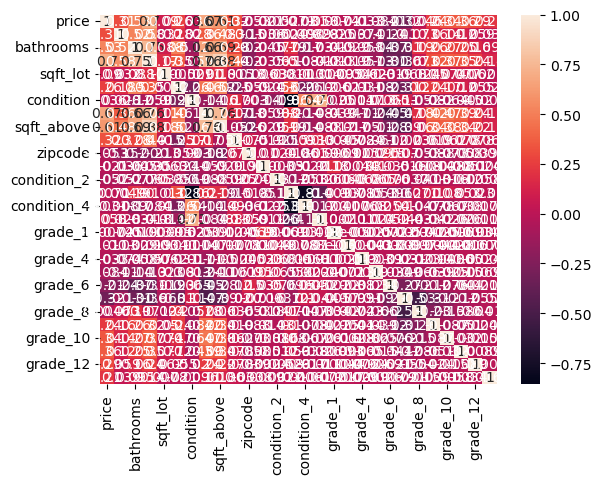

In [23]:
#correlation
correlations = data.corr()
sns.heatmap(correlations, annot=True)


In [24]:
correlations.to_csv("corr.csv")
